# Analyze data with Python

## 1. Load data and overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


## 2. Univariate analysis

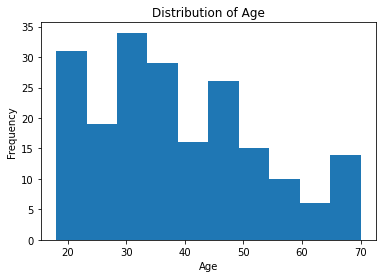

In [10]:
# Histogram
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age');

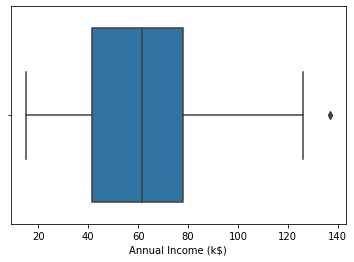

In [11]:
# Box plot
sns.boxplot(x='Annual Income (k$)',data=df);

## 3. Bivariate analysis

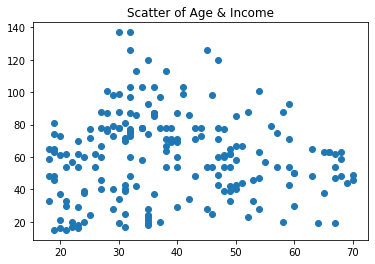

In [13]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.title('Scatter of Age & Income');

In [15]:
df = df.drop('CustomerID',axis=1)

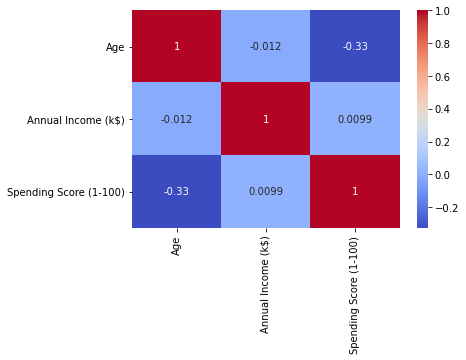

In [16]:
# Correlation
corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm');

## 4. Categorical analysis

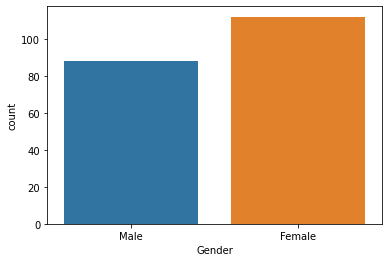

In [19]:
# Countplot
sns.countplot(x='Gender',data=df);

In [20]:
# Cross tab
cross_tab = pd.crosstab(df['Gender'],df['Age'])
print(cross_tab)

Age     18  19  20  21  22  23  24  25  26  27  ...  59  60  63  64  65  66  \
Gender                                          ...                           
Female   1   2   2   4   2   6   2   1   0   4  ...   0   2   1   0   1   1   
Male     3   6   3   1   1   0   2   2   2   2  ...   4   1   1   1   1   1   

Age     67  68  69  70  
Gender                  
Female   1   2   0   0  
Male     3   1   1   2  

[2 rows x 51 columns]


## 5. Explore relationship

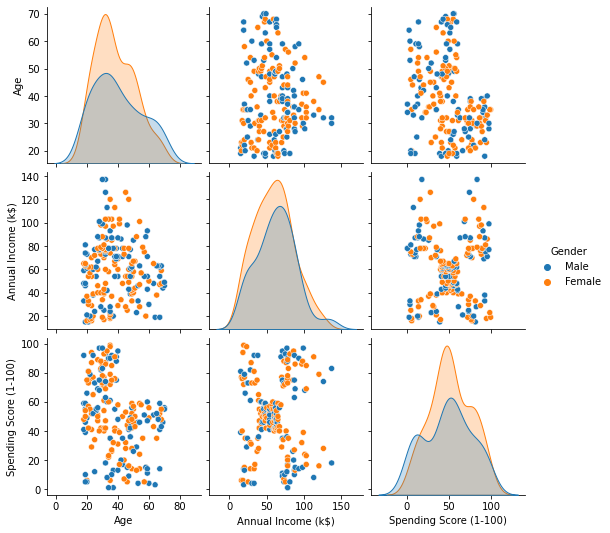

In [22]:
# Feature relationship
sns.pairplot(df,hue='Gender');

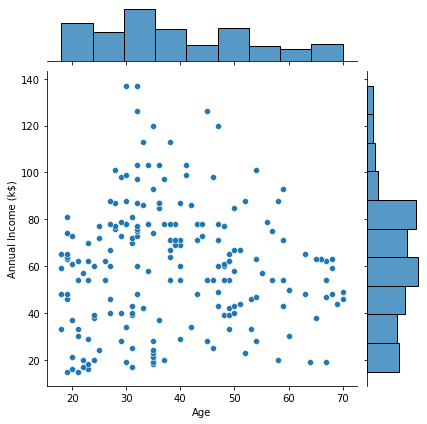

In [24]:
sns.jointplot(x='Age',y='Annual Income (k$)',data=df,kind='scatter');

## 6. Group by

In [25]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


## 7. Clustering method

In [26]:
# Univariate cluster
cluster_1 = KMeans(n_clusters=5)
cluster_1.fit(df[['Annual Income (k$)']])
cluster_1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [27]:
df['Income Cluster'] = cluster_1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,4
3,Female,23,16,77,4
4,Female,31,17,40,4


In [28]:
df['Income Cluster'].value_counts()

1    56
3    50
0    42
4    32
2    20
Name: Income Cluster, dtype: int64

In [29]:
# Elbow method
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

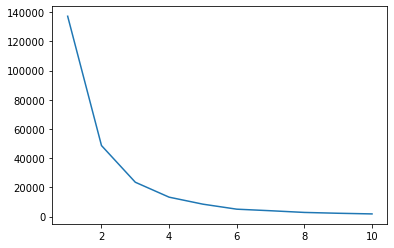

In [30]:
plt.plot(range(1,11),inertia_scores);

In [31]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,43.000000,42.238095,50.666667
1,36.410714,78.892857,49.642857
2,36.600000,109.700000,52.000000
3,41.520000,60.440000,50.060000
4,34.906250,22.000000,49.656250


In [32]:
# Bivariate cluster
cluster_2 = KMeans(n_clusters=5)
cluster_2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
cluster_2.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [33]:
df['Spending Score & Income Cluster'] = cluster_2.labels_

In [34]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,4
2,Female,20,16,6,4,2
3,Female,23,16,77,4,4
4,Female,31,17,40,4,2
5,Female,22,17,76,4,4
6,Female,35,18,6,4,2
7,Female,23,18,94,4,4
8,Male,64,19,3,4,2
9,Female,30,19,72,4,4


In [35]:
df['Spending Score & Income Cluster'].value_counts()

0    81
3    39
1    35
2    23
4    22
Name: Spending Score & Income Cluster, dtype: int64

In [36]:
centers = pd.DataFrame(cluster_2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,86.538462,82.128205
4,25.727273,79.363636


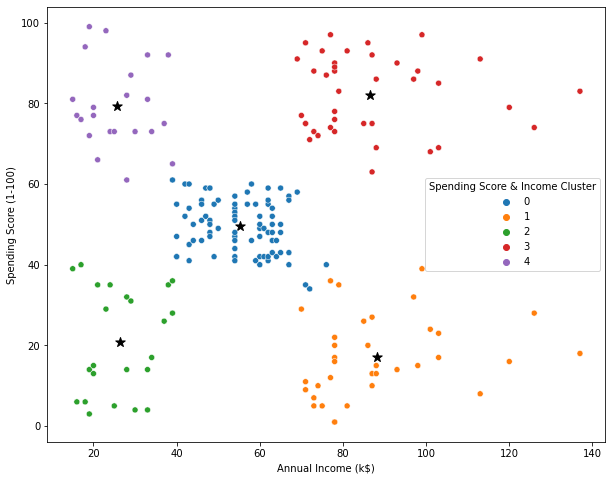

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',
                hue='Spending Score & Income Cluster', palette='tab10');

In [39]:
pd.crosstab(df['Spending Score & Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending Score & Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [40]:
df.groupby('Spending Score & Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending Score & Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


In [41]:
# Multivariate cluster
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
new_df = pd.get_dummies(df,drop_first=True)
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster,Gender_Male
0,19,15,39,4,2,1
1,21,15,81,4,4,1
2,20,16,6,4,2,0
3,23,16,77,4,4,0
4,31,17,40,4,2,0


In [42]:
new_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending Score & Income Cluster', 'Gender_Male'],
      dtype='object')

In [43]:
new_df = new_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [44]:
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [45]:
scaled_df = pd.DataFrame(scale.fit_transform(new_df))

In [46]:
scaled_df

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [47]:
scaled_df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [48]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    inertia_scores.append(kmeans.inertia_)

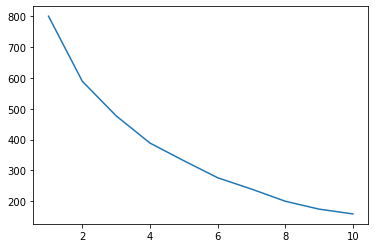

In [49]:
plt.plot(range(1,11),inertia_scores);

In [57]:
# n_clusters = 3
cluster_3 = KMeans(n_clusters=3)
cluster_3.fit(scaled_df)
cluster_3.labels_

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2])

In [58]:
df['Multivariate Cluster'] = cluster_3.labels_

In [59]:
scaled_df['Clusters'] = cluster_3.labels_

In [60]:
scaled_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
0,-1.424569,-1.738999,-0.434801,1.128152,0
1,-1.281035,-1.738999,1.195704,1.128152,0
2,-1.352802,-1.700830,-1.715913,-0.886405,1
3,-1.137502,-1.700830,1.040418,-0.886405,1
4,-0.563369,-1.662660,-0.395980,-0.886405,1
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405,2
196,0.441365,2.497807,-0.861839,-0.886405,1
197,-0.491602,2.497807,0.923953,1.128152,2
198,-0.491602,2.917671,-1.250054,1.128152,0


In [61]:
scaled_df['Clusters'].value_counts()

1    91
0    70
2    39
Name: Clusters, dtype: int64

In [62]:
centers = pd.DataFrame(cluster_3.cluster_centers_)
# centers.columns = ['x','y']
centers

,0,1,2,3,4
0,0.189156,-0.180596,-0.406517,1.128152,1.700000
1,0.043888,-0.286044,-0.218510,-0.886405,0.362637
2,-0.441917,0.991583,1.239503,0.043390,3.000000


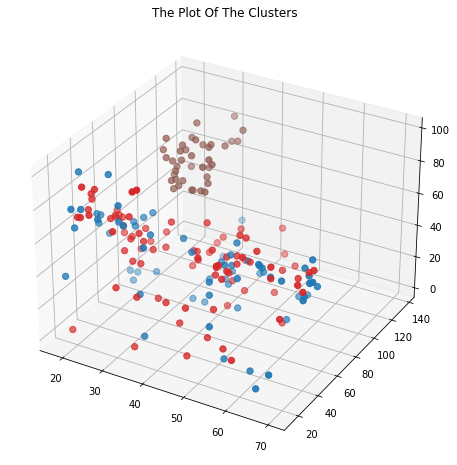

In [63]:
# display our clusters distribution in 3-D plot
import matplotlib.cm as cmap
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df["Age"],df["Annual Income (k$)"],df["Spending Score (1-100)"], 
           s=40, c=df["Multivariate Cluster"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()